<a href="https://colab.research.google.com/github/soeun823/hon_gong_machine/blob/master/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**문제**<br>
: 농어길이를 가지고 농어 무게를 예측, 다른 농어 데이터로 학습

# K-최근접이웃회귀

: 지도 알고리즘


*   분류
*   회귀 : 임의 어떤 숫자(값)을 예측<br>
    => 이웃한 샘플의 타깃값으로 평균을 내어 예측



> 혼공머신 115pg에 개념~




In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

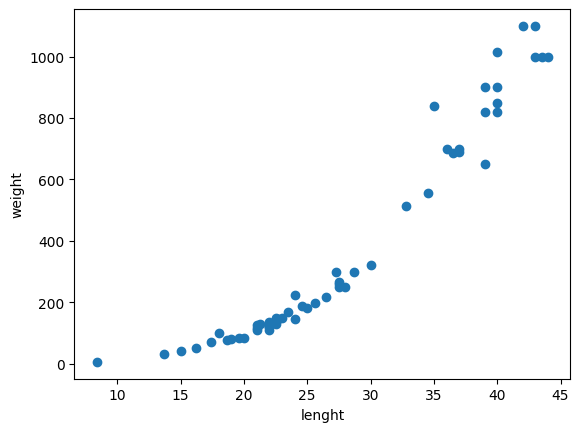

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array = test_array.reshape(2,2)#배열 크기 지정
print(test_array.shape)

(2, 2)


In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
#k-최근접 이웃 회귀 모델을 훈련 합니다.
knr.fit(train_input, train_target)
print(knr.score(test_input,test_target))

0.992809406101064


회귀에서는 예측하는 값이 모두 임의의 수이기 때문에 정확한 숫자를 맞힌다는 것은 불가능하다.<br>
회귀에서 평가하는 점수 :: **결정계수($R^2$)**<br>
$R^2 = 1 - \frac{(타깃 - 측)^2의 합}{(타깃 - 평균)^2의 합}$

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


훈련세트 점수 > 테스트새트 점수 : **과대 접합**<br>
테스트세트 점수 > 훈련세트 점수 or 두점수 모두 낮을 때 : **과소 접합**

In [11]:
knr.n_neighbors = 3 #이웃의 갯수 = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k 값을 줄였더니 훈련 세트의 $R^2$의 값이 높아짐

In [13]:
print(knr.score(test_input, test_target))# 성공적으로 잘 된거 같음!!!
#혼공 머신의 실력이 날로 늘어나는 군~

0.9746459963987609


**회귀문제 다루기**:문제 해결

# 선형회귀

홈공머신이 앞서 만든 모델을 사용해 예측을 한 값과 <br>
저울로 잰 값이 너무 나도 차이가 남ㅠㅠ

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


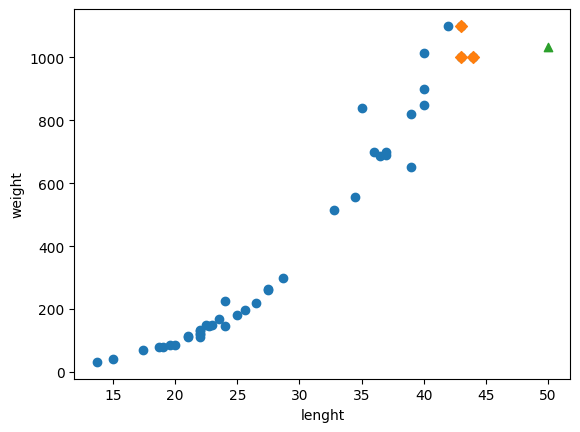

1033.3333333333333
[1033.33333333]


In [5]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes], marker="D")#이웃 샘플을 그림

plt.scatter(50,1033,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

#산점도를 보면 그래프가 오른족 위로 올라가는 형태라, 길이가 커질수록 무게가 올라간다,
#하지만 50cm 농어가 훈련세트의 범위에서 벗어나 엉뚱한 값으로 예측한다.
print(np.mean(train_target[indexes])) #여전히 엉뚱한 값
print(knr.predict([[100]]))#=>길이가 100cm 여도 가장 가까운 녀석들의 평균 값을 출력하니 같은 값이 나올것임

결론 :<br>
k-최근접 이웃 말고 다른 알고리즘을 찾아보자!!!!
<br><br>
**선형 회귀**

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


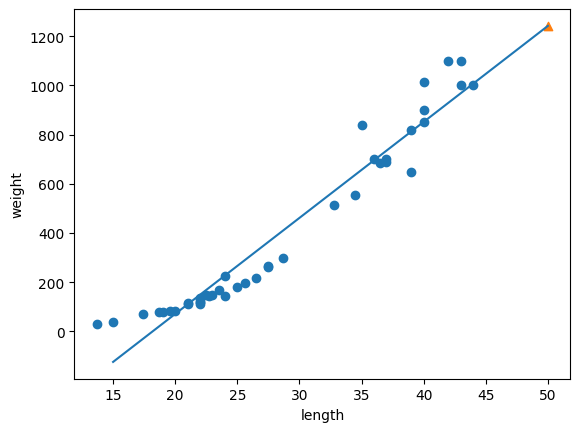

In [7]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])#15에서 50까지 1차 방정식 그래프

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#훈련세트 > 테스트세트 : 과대접합

0.939846333997604
0.8247503123313558


**다항회귀**,그래프가 살짝 곡선이네?
<BR> 살짝 이차함수 그래프다.

In [11]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [12]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [13]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


$무게 = 1.01 \times 길이^2 -21.6 \times 길이 + 116.05$
: 이 처럼 학습

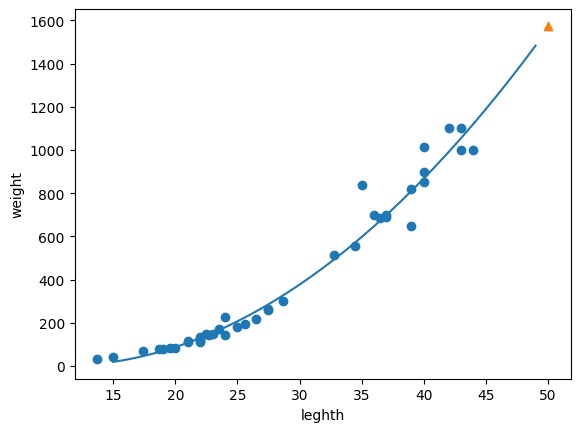

In [14]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('leghth')
plt.ylabel('weight')
plt.show()

In [15]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


: 살짝 과소접합이지만 좋은 경과!!, 홍홍 선배한테 도움을 요청~

# 특성 공학과 규제
:두께 데이터도 사용해 더 정확한 결과를 구할 것임!!<br>
scikit-learn의 polynomiaFeatures로 구현

**다중회귀** : 여러개의 특성을 사용한 선형회귀<br>
**특성공학** : 기존의 특성을 사용해 새로운 특성을 뽑아내느 작업 ,i.e., '$농어길이 \times 농어높이 => 새로운 특성$'

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))#이거 이해가 안됨;;

[[1. 2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names_out()#책이랑 문법이 다른거 같음
#위의 9개의 특성이 어ㅓㄸㅎ게 만들어 졌는지 확인 할 수 있음

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#과소접합은 해결, 특성을 더 많이 추가 하면 어떨까?

0.9903183436982125
0.9714559911594159


In [15]:
poly = PolynomialFeatures(degree=5 ,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
#특성이 55개로 많아짐

(42, 55)


In [17]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#훈련 세트는 완전 좋은 점수를 얻었지만
#테스트 세트는 처참한 점수를 갖게 되었다.
#특성갯수가 늘어 남에 따라 훈련세트는 과대접합되고 테스트세트는 형편없는 점수를 가지세 된다.

0.999999999999769
-144.40490595353674


**규제** : 머신러닝모델이 너무 과도하게 학습되지 못하게 하는거<br>
scikit_learn : StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

: 션형 회귀 모델에 규제를 추가한 모델을 **릿지**와 **라쏘**라고 부른다.
* 릿지 : 계수를 제곱한 값을 기준으로 규제
* 라쏘 : 계수의 절댓값을 기준으로 규제<br>
=> 둘 다 계수의 값을 줄이는 것이지만, 라쏘는 값이 0이 될 수도 있음

In [20]:
#릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#훈련세트는 점수가 쫌 낮아지고, 테스트는 정상으로 돌아왓다

0.9896101671037343
0.9790693977615388


In [21]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

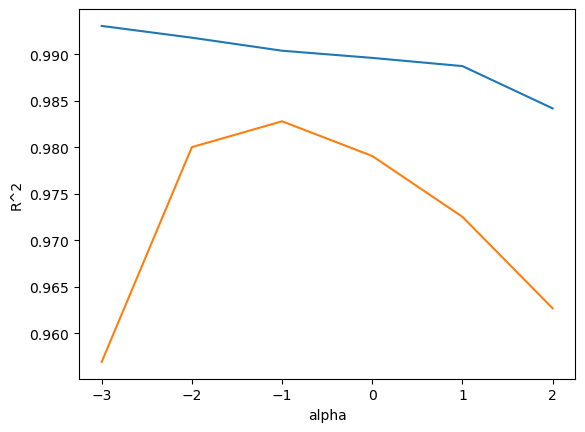

In [23]:
plt.plot(np.log10(alpha_list), train_score)# 퍼런색
plt.plot(np.log10(alpha_list), test_score) #주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#적절한 alpha값인 두 그래프가 가장 가깝고, 테스트세트 점수가 가장 높은 -1
#즉, 10^-1 = 0.1 로 최종 모델을 훈련

In [24]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#균형을 맞추고 있음

0.9903815817570366
0.9827976465386955


**라쏘회귀**

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [27]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    #밑에 에러는 반복이 적어서 나는거임

/Users/bagso-eun/miniconda3/envs/hongong/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/bagso-eun/miniconda3/envs/hongong/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


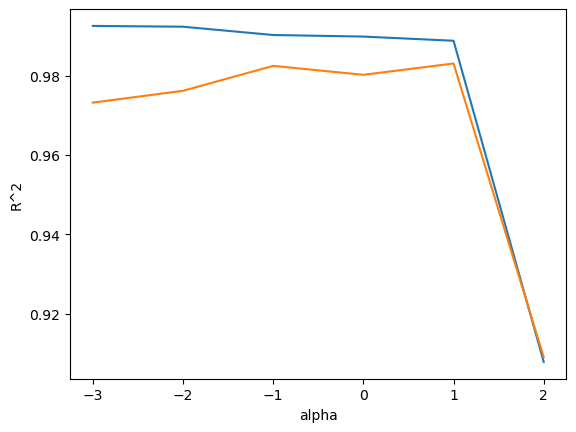

In [28]:
plt.plot(np.log10(alpha_list), train_score)# 파랑
plt.plot(np.log10(alpha_list), test_score)#주황
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #최적의 값은 1 즉 10^1 =10

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
print(np.sum(lasso.coef_ == 0))

40
